In [1]:

%load_ext autoreload
%autoreload 

import numpy as np
import seaborn as sns
import scipy
import skimage
sns.set_style("ticks")
from pathlib import Path

In [2]:
!pip install pandas==1.5.3 openpyxl

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
DEPRECATION: torch-tensorrt 1.1.0a0 has a non-standard dependency specifier torch>=1.10.0+cu113<1.11.0. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torch-tensorrt or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


# Get the data 

In [3]:
import pandas as pd
fn = sorted(list(Path(".").glob("*list_of_all_stitches*.xlsx")))[-1]
print(fn)
dfst = pd.read_excel(fn)

2024-07_list_of_all_stitches_sorted_by_duration.2024-09-02_22-16-50.xlsx


In [4]:
import plotly.express as px
dfst_st0_only = dfst[dfst["stitch_id"] == 0]
px.scatter(dfst_st0_only, y="movement evaluation stitch", x='annotation_annotation_time_and_movements', hover_data=["filename", "stitch_id"], width=500)


In [5]:
# dfst.reset_index(drop=True)
# dfst

In [6]:
dfst.shape

(93, 144)

In [7]:
dfst

Unnamed: 0                                           filename  \
0            0  Bad-2021_11_03_B_V_lz__Ann_Sophie_Einzelknopfn...   
1            1  Bad-2021_11_03_A_Spitze_Vanessa_Einzelknopfnah...   
2            2  Good-2021_10_27_B_Etzel_Peter_Einzelknopfnaht_...   
3            3  Medium-2021_11_03_A_Tengler_Sophie_Einzelknopf...   
4            4  Bad-12_10_21__Loewe__Rebekka__Einzelknopfnaht.mp4   
..         ...                                                ...   
88          88      Bildschirmaufnahme_2022-10-11_um_11.20.24.mov   
89          89          Einzelknopfnaht_Schwein_Kerstin_Preuß.mp4   
90          90                     Stresstest_Einzelknopfnaht.mp4   
91          91                           Hilger,Anke-Posttest.mp4   
92          92      Bildschirmaufnahme_2022-10-11_um_11.20.24.mov   

                     annotation_annotation_annotation  \
0   00:00:02 setup good\n00:00:07 wrong direction ...   
1   00:00:01 suture geomtry drawing is uneven from...   
2   00:00:08 setup is mostly good. there is a pen ...   
3   00:00:02 setup of desk is nice\n00:00:06 needl...   
4   00:00:05 forceps are placed in the right posit...   
..                                                ...   
88  00:00:17 stitch_start\n00:01:41 knot_start\n00...   
89  00:00:06 stitch_start\n00:00:32 knot_start \n0...   
90  Das Ergebnis finde ich sehr schön. Die Wundrän...   
91  00:00:06 stitch_start\n00:00:45 knot\n00:01:02...   
92  00:00:17 stitch_start\n00:01:41 knot_start\n00...   

    annotation_annotation_time_and_movements  \
0                                        2.0   
1                                        2.0   
2                                        2.0   
3                                        3.0   
4                                        1.0   
..                                       ...   
88                                       1.0   
89                                       1.0   
90                                       1.0   
91                                       1.0   
92                                       1.0   

                                           report_url  Stitch duration [s]  \
0   http://suran.kky.zcu.cz:8000//uploader/web_rep...                100.0   
1   http://suran.kky.zcu.cz:8000//uploader/web_rep...                125.0   
2   http://suran.kky.zcu.cz:8000//uploader/web_rep...                 92.0   
3   http://suran.kky.zcu.cz:8000//uploader/web_rep...                 54.0   
4   http://suran.kky.zcu.cz:8000//uploader/web_rep...                235.0   
..                                                ...                  ...   
88  http://suran.kky.zcu.cz:8000//uploader/web_rep...                121.0   
89  http://suran.kky.zcu.cz:8000//uploader/web_rep...                 50.0   
90  http://suran.kky.zcu.cz:8000//uploader/web_rep...                 54.0   
91  http://suran.kky.zcu.cz:8000//uploader/web_rep...                 43.0   
92  http://suran.kky.zcu.cz:8000//uploader/web_rep...                101.0   

    Stitch start at [s]  Needle holder stitch area presence [%]  \
0                   8.0                               68.342776   
1                   4.0                               76.252319   
2                   2.0                               81.228070   
3                   5.0                               64.977645   
4                  35.0                               77.207455   
..                  ...                                     ...   
88                552.0                               84.232656   
89                240.0                               83.359014   
90                348.0                               74.104683   
91                258.0                               73.524150   
92                698.0                               67.492260   

    Needle holder stitch median area presence [%]  \
0                                       88.597734   
1                                       79.468151   
2           

In [8]:
pd.__version__

'1.5.3'

# Find the correlation

In [9]:
# count numeric values in columns
# dfs.drop(["filename", "stars_auto"], axis=1).apply(lambda x: x.dtype is float).sum()
# relevant_column = "is_pretest_num"
relevant_column = "movement evaluation stitch"
# df

In [10]:
# # remove columns containing " stitch 1" in their name
# dfs = dfs.drop(dfs.columns[dfs.columns.str.contains(" stitch 1")], axis=1)
# dfs = dfs.drop(dfs.columns[dfs.columns.str.contains(" stitch 2")], axis=1)
# dfs = dfs.drop(dfs.columns[dfs.columns.str.contains(" stitch 3")], axis=1)
# dfs = dfs.drop(dfs.columns[dfs.columns.str.contains(" stitch 4")], axis=1)
# dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("Stitch 1")], axis=1)
# dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("Stitch 2")], axis=1)
# dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("Stitch 3")], axis=1)
# dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("Stitch 4")], axis=1)
# # dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("n_stitches_by_user")], axis=1)
# # dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("annotation_annotation_stars")], axis=1)



In [11]:
# dfst.corr(numeric_only=True)[relevant_column].abs().sort_values(ascending=False)["Needle holder stitch length [m]"]
dfst.corr(numeric_only=True)[relevant_column].abs().sort_values(ascending=False)



movement evaluation stitch                        1.000000
Stitch duration [s]                               0.841738
Piercing duration [s]                             0.821223
Knot duration [s]                                 0.804103
Needle holder stitch visibility [s]               0.787178
                                                    ...   
Forceps bbox piercing velocity                         NaN
Forceps bbox piercing velocity std                     NaN
Forceps bbox piercing velocity above threshold         NaN
Forceps bbox piercing velocity threshold [m/s]         NaN
Forceps bbox piercing visibility [%]                   NaN
Name: movement evaluation stitch, Length: 129, dtype: float64

In [79]:

corr = dfst.corr(numeric_only=True)[relevant_column].abs().sort_values(ascending=False).head(10)
corr = corr[corr.index != relevant_column] 
cols_X = list(corr.index)
sample_id_cols = ["filename", "stitch_id"]
corr


Stitch duration [s]                                      0.841738
Piercing duration [s]                                    0.821223
Knot duration [s]                                        0.804103
Needle holder stitch visibility [s]                      0.787178
Needle holder piercing visibility [s]                    0.774813
Needle holder to forceps piercing below threshold [s]    0.727490
Needle holder to forceps stitch below threshold [s]      0.725974
Needle holder knot visibility [s]                        0.719261
Needle holder stitch velocity above threshold            0.687725
Name: movement evaluation stitch, dtype: float64

### Pearson correlation test

P-value:

* A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.
* A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.
* The null hypothesis for the Pearson correlation test is that there is no linear correlation between the two variables.

In [80]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

results = {}

for column in cols_X:
    if column != relevant_column:
        
        dftest = dfst[[column, relevant_column]].copy()
        dftest = dftest.dropna()
        
        vals0 = dftest[column] 
        vals1 = dftest[relevant_column]
        
        corr_coef, p_value = pearsonr(vals0, vals1)
        results[column] = {'correlation_coefficient': corr_coef, 'p_value': p_value}

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
results_df

correlation_coefficient  \
Stitch duration [s]                                                  -0.841738   
Piercing duration [s]                                                -0.821223   
Knot duration [s]                                                    -0.804103   
Needle holder stitch visibility [s]                                  -0.787178   
Needle holder piercing visibility [s]                                -0.774813   
Needle holder to forceps piercing below threshold [s]                -0.727490   
Needle holder to forceps stitch below threshold [s]                  -0.725974   
Needle holder knot visibility [s]                                    -0.719261   
Needle holder stitch velocity above threshold                        -0.687725   

                                                            p_value  
Stitch duration [s]                                    2.779347e-25  
Piercing duration [s]                                  1.112873e-21  
Knot duration [s]                                      3.276729e-20  
Needle holder stitch visibility [s]                    3.610385e-20  
Needle holder piercing visibility [s]                  5.256287e-18  
Needle holder to forceps piercing below threshold [s]  6.734661e-15  
Needle holder to forceps stitch below threshold [s]    8.330426e-16  
Needle holder knot visibility [s]                      1.292919e-14  
Needle holder stitch velocity above threshold          7.026828e-14


## Find the best columns to predict annotation_annotation_stars

In [81]:
dfst.columns[dfst.columns.str.contains("annotation_annotation")]

Index(['annotation_annotation_annotation', 'annotation_annotation_time_and_movements'], dtype='object')

In [82]:

dfst.columns[dfst.columns.str.contains("duration")]


Index(['Stitch duration [s]', 'Knot duration [s]', 'Piercing duration [s]'], dtype='object')

In [83]:
# get columns containing "0"
# cols_with_0 = list(dfs.columns[dfs.columns.str.contains("0")])
# cols_with_0

In [84]:
# try to find the best columns to predict stars_auto
# corr = dfs[cols_with_0 + [relevant_column]].corr(numeric_only=True)[relevant_column].abs().sort_values(ascending=False) #.head(20)
# corr = corr[corr.index != "stars_auto"] 

# corr

In [85]:
# # corr = dfs.corr(numeric_only=True)["annotation_annotation_stars"].abs().sort_values(ascending=False).head(7)
# measurement_vs_annotation_separator = dfs.columns.str.contains("annotation_annotation")
# # corr = dfs.corr(numeric_only=True)["annotation_annotation_stars"].abs().sort_values(ascending=False).head(7)
# # corr on one axis measurement, on the other annotation, just the first 10
# corr = dfs.corr(numeric_only=True).abs()
# corr





In [86]:
#select the columns containing "annotation_annotation" in their name
# measurement_vs_annotation_separator = corr.index.str.contains("annotation_annotation")
# measurement_vs_annotation_separator

In [87]:
# import seaborn as sns
# g = sns.pairplot(dfs, y_vars=corr.index[measurement_vs_annotation_separator], 
#              x_vars=corr.index[~measurement_vs_annotation_separator],
#              # x_vars=["stars_auto"]
#              # hue="n_stitches_by_user"
#              )
# g.map_lower(sns.kdeplot, levels=3, color=".2")

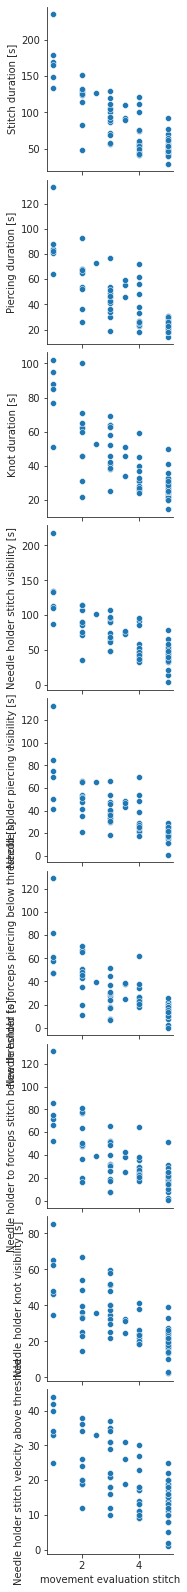

In [88]:

sns.pairplot(dfst, y_vars=corr.index,
             # x_vars=corr.index,
             x_vars=[relevant_column]
             )


In [89]:
# make interactive graph on hover display filename and stitch_id and control the width of the plot
import plotly.express as px
px.scatter(dfst, y="Needle holder stitch visibility [s]", x=relevant_column, hover_data=["filename", "stitch_id"], width=500)
# px.scatter(dfs, x="Needle holder stitch length [m]", y=relevant_column)


In [90]:

import plotly.express as px
px.scatter(dfst, y="Needle holder stitch length [m]", x=relevant_column, hover_data=["filename", "stitch_id"], width=500)


In [91]:
list(corr.index)

['Stitch duration [s]',
 'Piercing duration [s]',
 'Knot duration [s]',
 'Needle holder stitch visibility [s]',
 'Needle holder piercing visibility [s]',
 'Needle holder to forceps piercing below threshold [s]',
 'Needle holder to forceps stitch below threshold [s]',
 'Needle holder knot visibility [s]',
 'Needle holder stitch velocity above threshold']

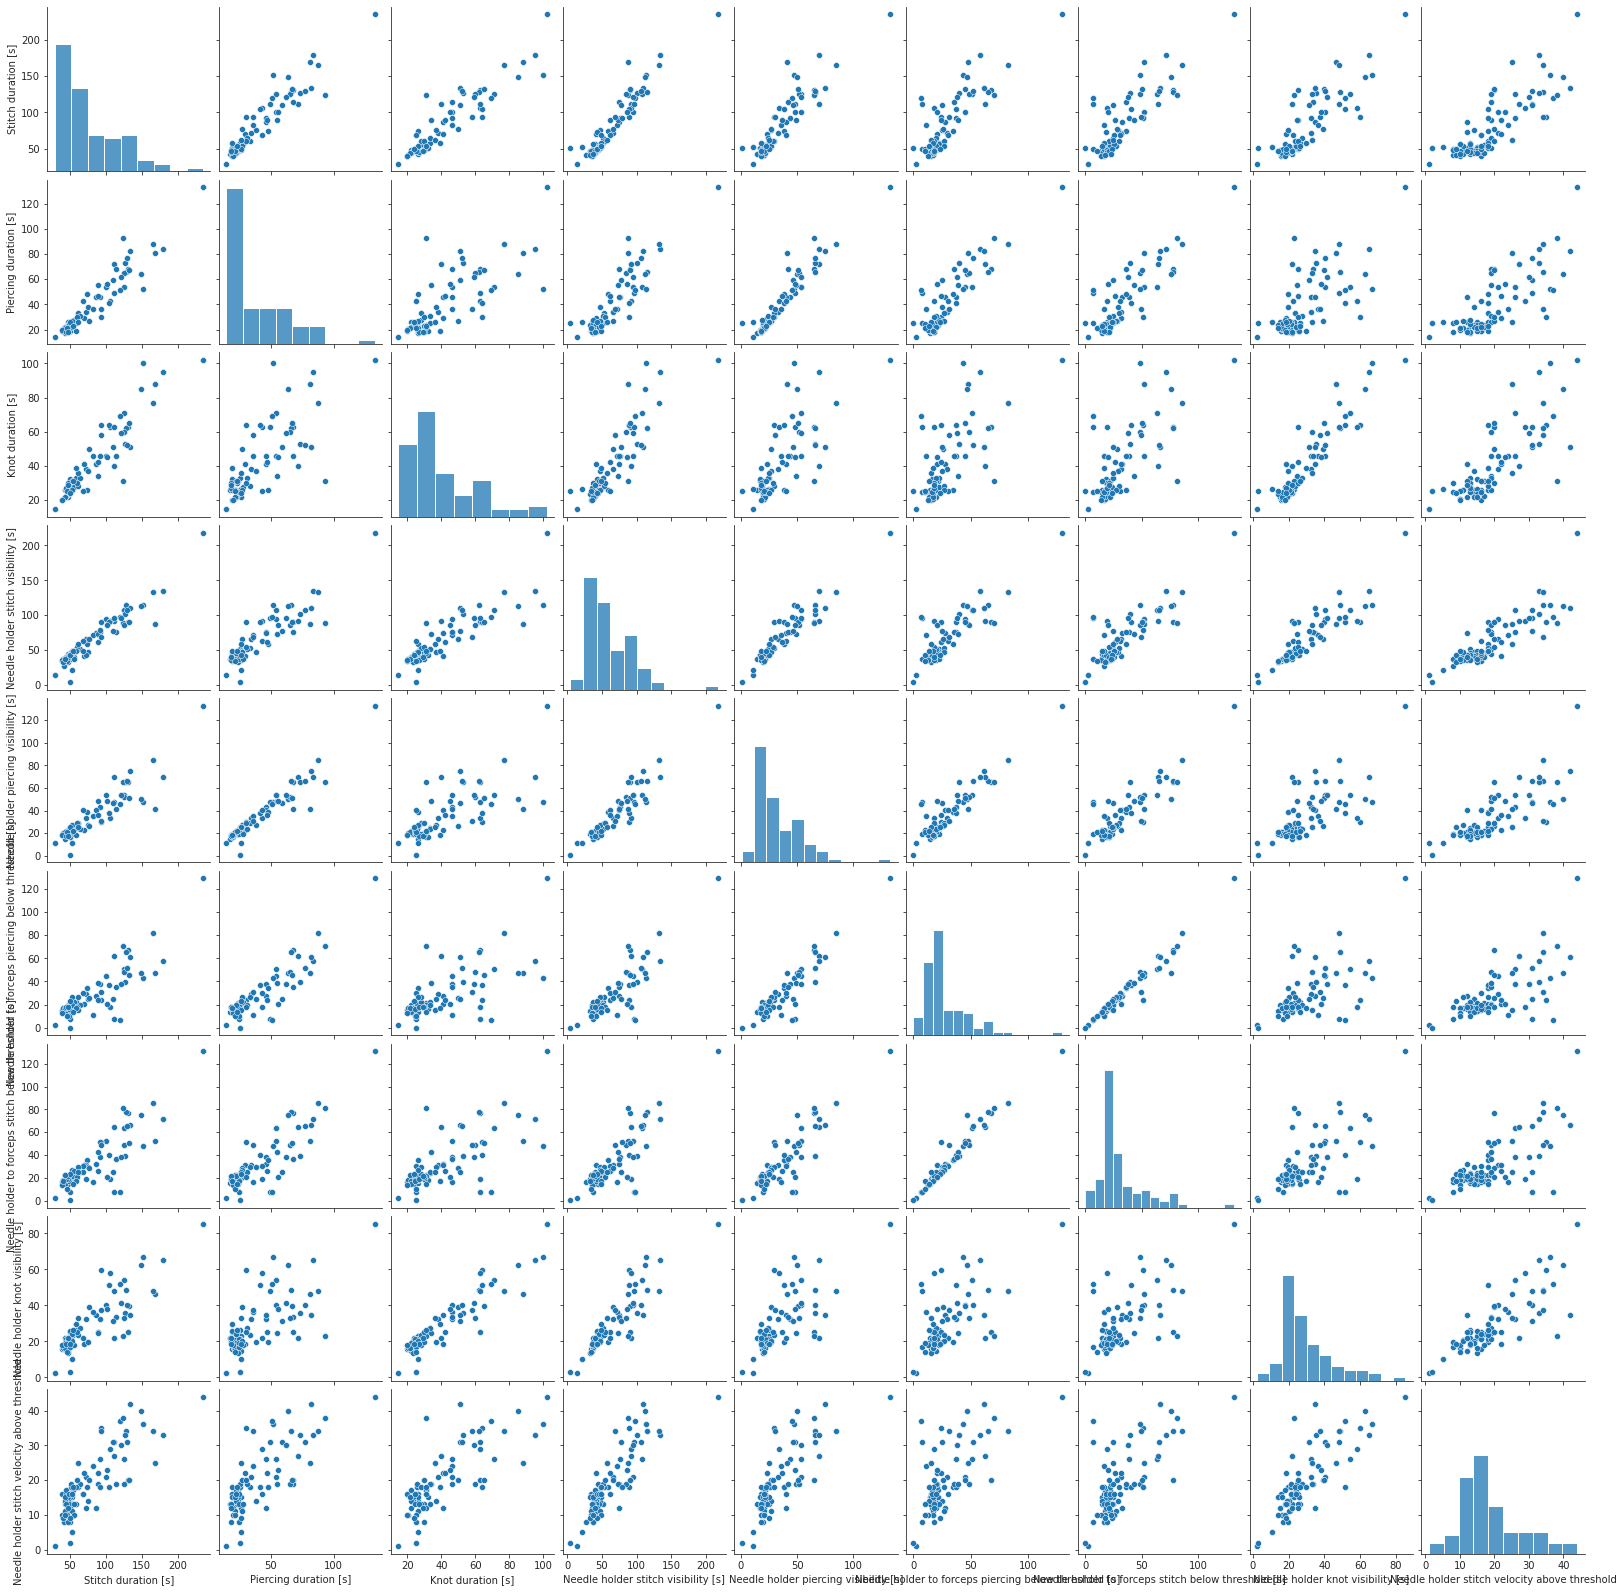

In [92]:

sns.pairplot(dfst, y_vars=list(corr.index),
             x_vars=list(corr.index),
             # x_vars=[relevant_column]
             )


In [93]:

# corr = dfs.corr(numeric_only=True)["stars_auto"].sort_values(ascending=False).head(10)
# corr


In [94]:
# columns_to_be_removed = ["stars_auto"]
# columns = list(corr.index)
# columns = [col for col in columns if col not in columns_to_be_removed]
# columns 

In [95]:
# pretest_mean = dfs[dfs[relevant_column] == 1][cols_with_0 + [relevant_column]].mean()
# posttest_mean = dfs[dfs[relevant_column] == 0][cols_with_0 + [relevant_column]].mean()
# pretest_var = dfs[dfs[relevant_column] == 1][cols_with_0 + [relevant_column]].var()
# posttest_var = dfs[dfs[relevant_column] == 0][cols_with_0 + [relevant_column]].var()






## Check correlation between selected columns


In [96]:
for colname in dfst.columns:
    print(colname)


Unnamed: 0
filename
annotation_annotation_annotation
annotation_annotation_time_and_movements
report_url
Stitch duration [s]
Stitch start at [s]
Needle holder stitch area presence [%]
Needle holder stitch median area presence [%]
Needle holder stitch length [m]
Needle holder stitch visibility [s]
Needle holder stitch velocity
Needle holder stitch velocity std
Needle holder stitch velocity above threshold
Needle holder stitch velocity threshold [m/s]
Needle holder stitch unit
Needle holder stitch visibility [%]
Forceps stitch area presence [%]
Forceps stitch median area presence [%]
Forceps stitch length [m]
Forceps stitch visibility [s]
Forceps stitch velocity
Forceps stitch velocity std
Forceps stitch velocity above threshold
Forceps stitch velocity threshold [m/s]
Forceps stitch unit
Forceps stitch visibility [%]
Scissors stitch area presence [%]
Scissors stitch median area presence [%]
Scissors stitch length [m]
Scissors stitch visibility [s]
Scissors stitch velocity
Scissors stitch

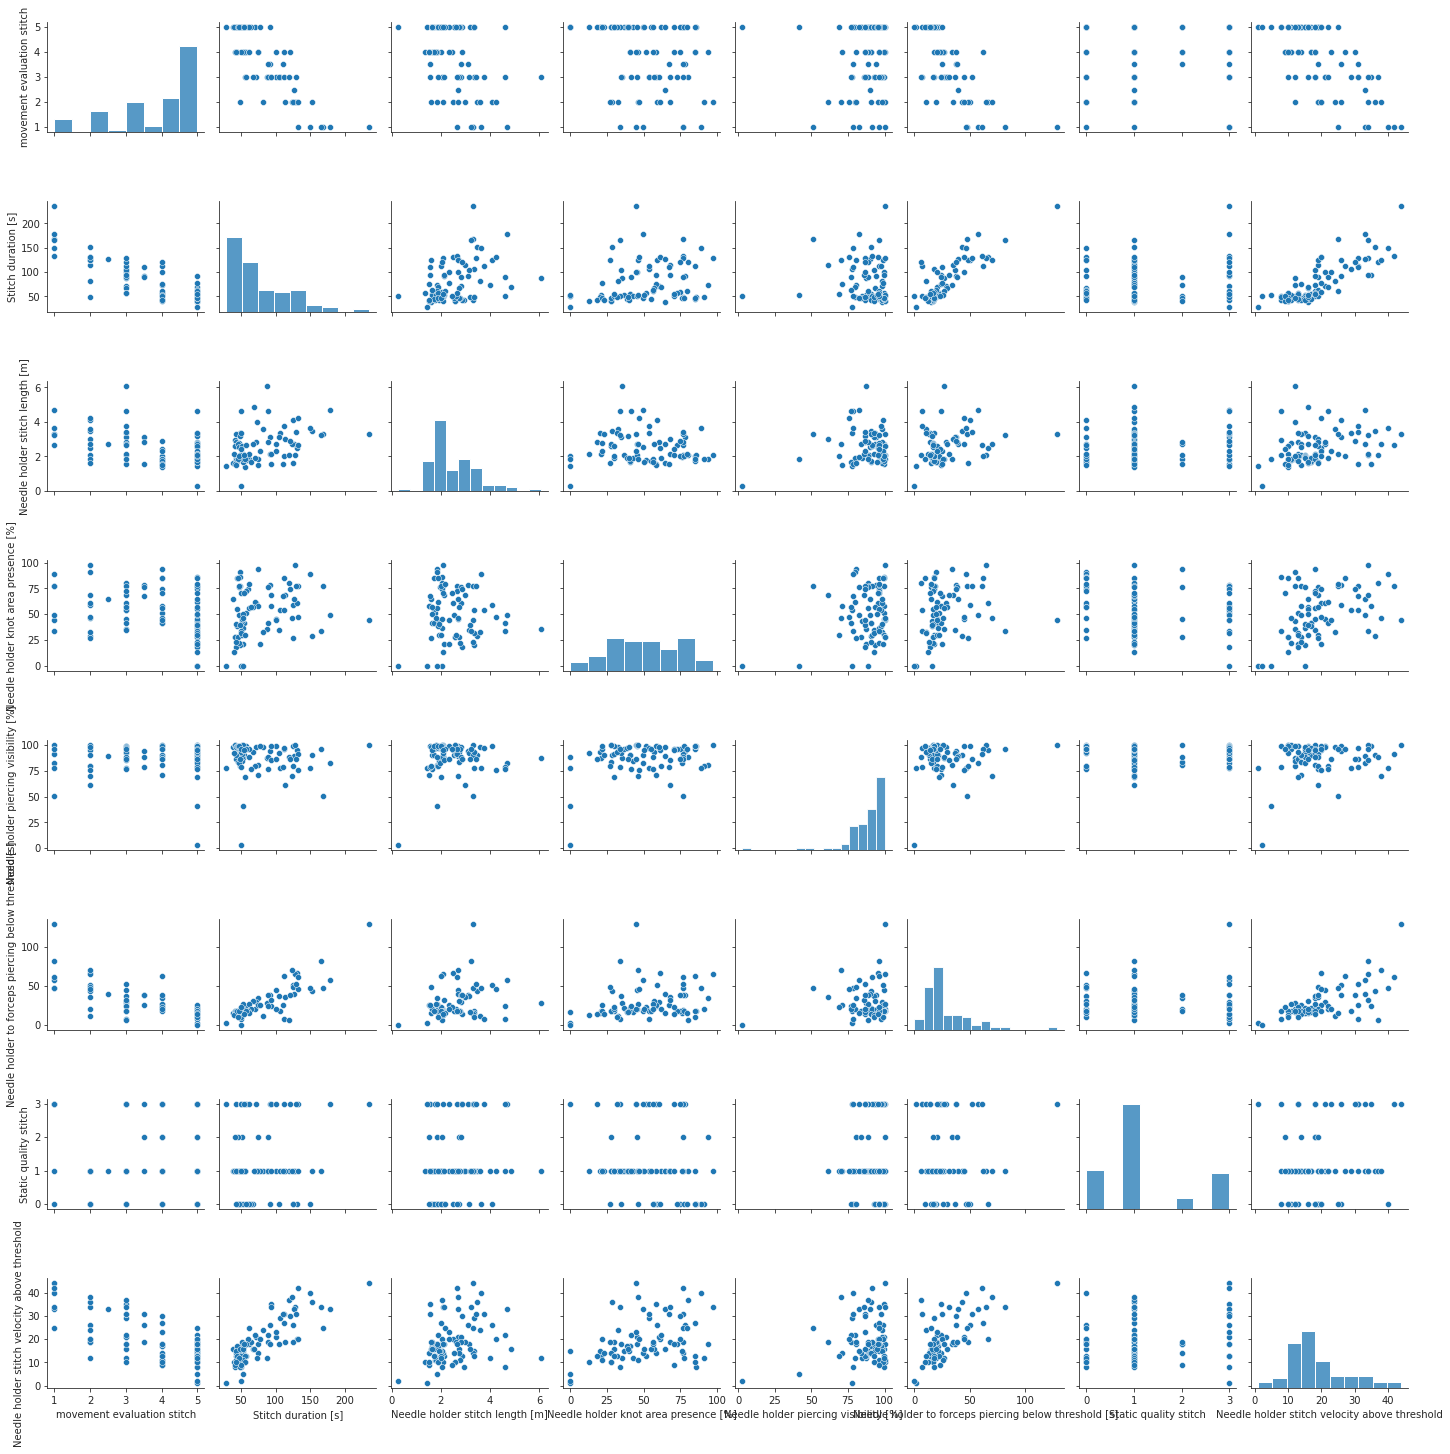

In [97]:
selected_columns = [ "movement evaluation stitch", 
                     "Stitch duration [s]",
                     "Needle holder stitch length [m]",
                     # "Needle holder stitch visibility [s]", 
                     "Needle holder knot area presence [%]", 
                     # "Needle holder stitch visibility [%]", 
                     
                     "Needle holder piercing visibility [%]", 
                     "Needle holder to forceps piercing below threshold [s]",
                     "Static quality stitch",
                     "Needle holder stitch velocity above threshold"
                     ]

sns.pairplot(dfst, y_vars=
                selected_columns,
             x_vars=selected_columns,
             # x_vars=[relevant_column]
             )


In [98]:
# df_stats = pd.DataFrame({"pretest": pretest_mean, "posttest": posttest_mean, "pretest_var": pretest_var, "posttest_var": posttest_var})
# df_stats["diff"] = df_stats["pretest"] - df_stats["posttest"]
# df_stats

In [99]:
print(len(dfst))
dfst[cols_X + [relevant_column]].notna().sum()
dfst[selected_columns].notna().sum()


93


movement evaluation stitch                               90
Stitch duration [s]                                      93
Needle holder stitch length [m]                          93
Needle holder knot area presence [%]                     84
Needle holder piercing visibility [%]                    84
Needle holder to forceps piercing below threshold [s]    83
Static quality stitch                                    89
Needle holder stitch velocity above threshold            93
dtype: int64

In [100]:
# give me list of all files names with notna in the selected columns
dfst[cols_X + [relevant_column]].notna().all(axis=1).sum()

83

In [101]:
dfst[dfst[cols_X + [relevant_column]].notna().all(axis=1)]["filename"].unique()

array(['Bad-2021_11_03_B_V_lz__Ann_Sophie_Einzelknopfnaht_am_Schweinefu___1_.mp4',
       'Bad-2021_11_03_A_Spitze_Vanessa_Einzelknopfnaht_am_Schweinefu_.mp4',
       'Good-2021_10_27_B_Etzel_Peter_Einzelknopfnaht_am_Schweinefu_.mp4',
       'Medium-2021_11_03_A_Tengler_Sophie_Einzelknopfnaht_Schweinefu_.mp4',
       'Bad-12_10_21__Loewe__Rebekka__Einzelknopfnaht.mp4',
       'Bad-2021_11_3_A_Brodersen___nne_Einzelknopfnaht_am_Schweinefu_.mp4',
       'medium-2021_11_03_A_Tengler_Sophie_Einzelknopfnaht_Schweinefu_.mp4',
       'Good-Einzelknopfnaht_Stoklossa.mp4',
       'Medium-2021_11_03_A_Seifert_Johanna_Einzelknopfnaht_am_Schweinefu_.mp4',
       'Bad-2021_11_03_A_Noll_Alexander_Einzelknopfnaht.mp4',
       'Good-Schmidt_Elisabeth_Einzelknotennaht_11_10_2021_MP4_SparkVideo.mp4',
       'Good-Schweinefu__Einzelknopfnaht.mp4',
       'Bad-03_11_21_B_Hopfe_Johanna_Einzelknopfnaht.mp4',
       'Medium-RPReplay_Final1634048018.mp4', 'Medium-Schweinefu_.mp4',
       'Einzelknopfnaht_Schw

In [102]:
# ! pip install ace_tools

# Statistical testing

In [103]:
import pandas as pd
import scipy.stats as stats

# Columns to compare
# cols_with_0 = list(df_stats.index)  # Replace with your actual column names
# relevant_column = "is_pretest_num"



# DataFrames for each group
pretest_df = dfst[dfst[relevant_column] > 2.5][["filename"] + cols_X]
posttest_df = dfst[dfst[relevant_column] <= 2.5][["filename"] + cols_X]

# Ensure both dataframes are sorted by the same criteria to maintain pairing
pretest_df.sort_values(by="filename", inplace=True)
posttest_df.sort_values(by="filename", inplace=True)


# Perform t-tests
t_stats = []
p_values = []
col_names =[]
t_stats_less = []
p_values_less = []
col_names_less =[]
t_stats_greater = []
p_values_greater = []
col_names_greater =[]

data = {
    "col_name": [],
    "p_value_two-sided": [],
    "p_value_less": [],
    "p_value_greater": [],
    "t_stat_two-sided": [],
    "t_stat_less": [],
    "t_stat_greater": [],
}
for col in cols_X:
    try:
        data["col_name"].append(col)
        for alternative in ["two-sided", "less", "greater"]:
            
            t_stat, p_value = stats.ttest_ind(pretest_df[col], posttest_df[col], equal_var=False, alternative=alternative, nan_policy='omit')  # Assuming unequal variance
            data[f"t_stat_{alternative}"].append(t_stat)
            data[f"p_value_{alternative}"].append(p_value)
    except:
        print(col)
        import traceback
        traceback.print_exc()

# Collect the statistics in a DataFrame
print(data)
df_stats = pd.DataFrame(
    data
)


df_stats

Piercing duration [s]
Knot duration [s]
Needle holder piercing visibility [s]
Needle holder to forceps piercing below threshold [s]
Needle holder to forceps stitch below threshold [s]
Needle holder knot visibility [s]
{'col_name': ['Stitch duration [s]', 'Piercing duration [s]', 'Knot duration [s]', 'Needle holder stitch visibility [s]', 'Needle holder piercing visibility [s]', 'Needle holder to forceps piercing below threshold [s]', 'Needle holder to forceps stitch below threshold [s]', 'Needle holder knot visibility [s]', 'Needle holder stitch velocity above threshold'], 'p_value_two-sided': [8.951430922787684e-07, 2.6728263413694955e-06, 3.081678012693541e-05, 3.192915104356222e-05, 5.008114688331295e-05, 8.679178174920177e-05, 4.4373957105268985e-05, 0.0006001476653186201, 4.1317707486344416e-05], 'p_value_less': [4.475715461393842e-07, 1.596457552178111e-05, 2.0658853743172208e-05], 'p_value_greater': [0.9999995524284538, 0.9999840354244782, 0.9999793411462569], 't_stat_two-sided'

Traceback (most recent call last):
  File "/tmp/ipykernel_19521/4105462785.py", line 44, in <cell line: 39>
    t_stat, p_value = stats.ttest_ind(pretest_df[col], posttest_df[col], equal_var=False, alternative=alternative, nan_policy='omit')  # Assuming unequal variance
  File "/home/appuser/.local/lib/python3.8/site-packages/scipy/stats/stats.py", line 6103, in ttest_ind
    raise ValueError("nan-containing/masked inputs with "
ValueError: nan-containing/masked inputs with nan_policy='omit' are currently not supported by permutation tests, one-sided asymptotic tests, or trimmed tests.
Traceback (most recent call last):
  File "/tmp/ipykernel_19521/4105462785.py", line 44, in <cell line: 39>
    t_stat, p_value = stats.ttest_ind(pretest_df[col], posttest_df[col], equal_var=False, alternative=alternative, nan_policy='omit')  # Assuming unequal variance
  File "/home/appuser/.local/lib/python3.8/site-packages/scipy/stats/stats.py", line 6103, in ttest_ind
    raise ValueError("nan-contai

ValueError: All arrays must be of the same length

In [ ]:
pretest_df.mean()


In [ ]:
posttest_df.mean()

## Find general correlation



In [ ]:
# cols

In [ ]:
# list(cols)

In [ ]:
# try to find the best columns to predict stars_auto


# corr = dfs.corr(numeric_only=True)
# numeric_cols = corr.columns[corr.columns.str.contains("annotation_annotation")]
# corr = corr[numeric_cols].abs()# .sort_values(by="annotation_annotation_stars", ascending=False).head(10)
# # keep just rows not containing "annotation_annotation" in the index
# corr = corr[~corr.index.str.contains("annotation_annotation")]
# 
# # [list(cols)].abs()# .sort_values(ascending=False).head(10)
# # corr = corr[corr.index != "stars_auto"] 
# 
# corr

In [ ]:
# argmax in dataframe
corr.loc[corr.idxmax()]

In [ ]:
# dfs[["annotation_annotation_knots_are_done_right", 'filename']]

# Train predictor

In [104]:
print(corr.shape)
corr = corr.dropna()
print(corr.shape)


(9,)
(9,)


In [105]:
corr.index

Index(['Stitch duration [s]', 'Piercing duration [s]', 'Knot duration [s]',
       'Needle holder stitch visibility [s]',
       'Needle holder piercing visibility [s]',
       'Needle holder to forceps piercing below threshold [s]',
       'Needle holder to forceps stitch below threshold [s]',
       'Needle holder knot visibility [s]',
       'Needle holder stitch velocity above threshold'],
      dtype='object')

In [106]:
import sklearn
# train a model to predict stars_auto
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# import SVM
from sklearn.svm import SVR
# sample_id_cols = ["filename", "stitch_id"]
#train a model to predict stars_auto

predicted_columns = [relevant_column]  # list(corr.columns[corr.columns.str.contains("is_pretest_num")])
# columns = list(corr.index[~corr.index.str.contains(relevant_column)])
# columns = cols_X + sample_id_cols
# columns = list(corr.index)
# columns.append("filename")
print(predicted_columns)
# print(columns)



['movement evaluation stitch']


### Remove NA values

In [107]:
# remove known problematic columns

# # remove row with index 1708
# if 1708 in dfs.index:
#     dfs = dfs.drop(1708)
# 
# if 1667 in dfs.index:
#     dfs = dfs.drop(1667)
# 
# # remove "qr_data_pix_size_single_frame_detector_m" from the columns
# if "qr_data_pix_size_single_frame_detector_m" in columns:
#     columns.remove("qr_data_pix_size_single_frame_detector_m")

# dfs[cols].isna().sum()


In [108]:
dfst[["filename", "stitch_id"] + sample_id_cols + cols_X]

filename  \
0   Bad-2021_11_03_B_V_lz__Ann_Sophie_Einzelknopfnaht_am_Schweinefu___1_.mp4   
1         Bad-2021_11_03_A_Spitze_Vanessa_Einzelknopfnaht_am_Schweinefu_.mp4   
2           Good-2021_10_27_B_Etzel_Peter_Einzelknopfnaht_am_Schweinefu_.mp4   
3         Medium-2021_11_03_A_Tengler_Sophie_Einzelknopfnaht_Schweinefu_.mp4   
4                          Bad-12_10_21__Loewe__Rebekka__Einzelknopfnaht.mp4   
..                                                                       ...   
88                             Bildschirmaufnahme_2022-10-11_um_11.20.24.mov   
89                                 Einzelknopfnaht_Schwein_Kerstin_Preuß.mp4   
90                                            Stresstest_Einzelknopfnaht.mp4   
91                                                  Hilger,Anke-Posttest.mp4   
92                             Bildschirmaufnahme_2022-10-11_um_11.20.24.mov   

    stitch_id  \
0           0   
1           0   
2           0   
3           0   
4           0   
..        ...   
88          3   
89          4   
90          4   
91          4   
92          4   

                                                                    filename  \
0   Bad-2021_11_03_B_V_lz__Ann_Sophie_Einzelknopfnaht_am_Schweinefu___1_.mp4   
1         Bad-2021_11_03_A_Spitze_Vanessa_Einzelknopfnaht_am_Schweinefu_.mp4   
2           Good-2021_10_27_B_Etzel_Peter_Einzelknopfnaht_am_Schweinefu_.mp4   
3         Medium-2021_11_03_A_Tengler_Sophie_Einzelknopfnaht_Schweinefu_.mp4   
4                          Bad-12_10_21__Loewe__Rebekka__Einzelknopfnaht.mp4   
..                                                                       ...   
88                             Bildschirmaufnahme_2022-10-11_um_11.20.24.mov   
89                                 Einzelknopfnaht_Schwein_Kerstin_Preuß.mp4   
90                                            Stresstest_Einzelknopfnaht.mp4   
91                                                  Hilger,Anke-Posttest.mp4   
92                             Bildschirmaufnahme_2022-10-11_um_11.20.24.mov   

    stitch_id  Stitch duration [s]  Piercing duration [s]  Knot duration [s]  \
0           0                100.0                   54.0               46.0   
1           0                125.0                   54.0               71.0   
2           0                 92.0                   46.0               46.0   
3           0                 54.0                   23.0               31.0   
4           0                235.0                  133.0              102.0   
..        ...                  ...                    ...                ...   
88          3                121.0                   62.0               59.0   
89          4                 50.0                   26.0               24.0   
90          4                 54.0                   23.0               31.0   
91          4                 43.0                    NaN                NaN   
92          4                101.0                   56.0               45.0   

    Needle holder stitch visibility [s]  \
0                             94.133333   
1                            107.800000   
2                             76.000000   
3                             44.733333   
4                            218.200000   
..                                  ...   
88                            95.133333   
89                            43.266667   
90                            48.400000   
91                            37.266667   
92                            86.133333   

    Needle holder piercing visibility [s]  \
0                               53.666667   
1                               53.533333   
2                               43.333333   
3                               20.800000   
4                              132.933333   
..                                    ...   
88                              53.800000   
89                              25.000000   
90                              21.933333   
91           

In [109]:

# count NA values in columns

dfst[cols_X + sample_id_cols].isna().sum().sort_values(ascending=False)


Needle holder to forceps piercing below threshold [s]    10
Piercing duration [s]                                     9
Knot duration [s]                                         9
Needle holder piercing visibility [s]                     9
Needle holder knot visibility [s]                         9
Needle holder to forceps stitch below threshold [s]       1
Stitch duration [s]                                       0
Needle holder stitch visibility [s]                       0
Needle holder stitch velocity above threshold             0
filename                                                  0
stitch_id                                                 0
dtype: int64

In [110]:
dfst[cols_X + sample_id_cols].isna().sum(axis=1).sort_values(ascending=False)

77    5
81    5
91    5
78    5
71    5
     ..
30    0
29    0
28    0
27    0
92    0
Length: 93, dtype: int64

In [111]:
dfsc = dfst[
    dfst["Stitch duration [s]"].notna() &
    dfst["Needle holder stitch visibility [s]"].notna() &
    dfst[predicted_columns[0]].notna()
    # dfs[predicted_columns].notna()
]
display(dfsc)
cols_X_with_sample_id = sample_id_cols + cols_X

dfsc[cols_X_with_sample_id].isna().sum().sort_values(ascending=False)

display(dfsc[cols_X_with_sample_id].isna().sum().sort_values(ascending=False))

# fill 0 instead of None
dfsc = dfsc[sample_id_cols + predicted_columns + cols_X].copy()
dfsc[cols_X] = dfsc[cols_X].fillna(0)

print(len(dfsc))

Unnamed: 0  \
0            0   
1            1   
2            2   
3            3   
4            4   
..         ...   
88          88   
89          89   
90          90   
91          91   
92          92   

                                                                    filename  \
0   Bad-2021_11_03_B_V_lz__Ann_Sophie_Einzelknopfnaht_am_Schweinefu___1_.mp4   
1         Bad-2021_11_03_A_Spitze_Vanessa_Einzelknopfnaht_am_Schweinefu_.mp4   
2           Good-2021_10_27_B_Etzel_Peter_Einzelknopfnaht_am_Schweinefu_.mp4   
3         Medium-2021_11_03_A_Tengler_Sophie_Einzelknopfnaht_Schweinefu_.mp4   
4                          Bad-12_10_21__Loewe__Rebekka__Einzelknopfnaht.mp4   
..                                                                       ...   
88                             Bildschirmaufnahme_2022-10-11_um_11.20.24.mov   
89                                 Einzelknopfnaht_Schwein_Kerstin_Preuß.mp4   
90                                            Stresstest_Einzelknopfnaht.mp4   
91                                                  Hilger,Anke-Posttest.mp4   
92                             Bildschirmaufnahme_2022-10-11_um_11.20.24.mov   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          annotation_annotation_annotation  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              00:00:02 setup good\n00:00:07 wrong direction of suturing for right handed person\n00:00:12 needle holder not stabilitzed with index finger\n00:00:41 needle not grabbed with the tip of the needleholder\n00:00:58 needle not taken out with a round movement leading to damage of the skin\n00:01:09 movements too big\n00:01:15 couldve us

Needle holder to forceps piercing below threshold [s]    7
Piercing duration [s]                                    6
Knot duration [s]                                        6
Needle holder piercing visibility [s]                    6
Needle holder knot visibility [s]                        6
Needle holder to forceps stitch below threshold [s]      1
filename                                                 0
stitch_id                                                0
Stitch duration [s]                                      0
Needle holder stitch visibility [s]                      0
Needle holder stitch velocity above threshold            0
dtype: int64

90


In [112]:
# dfsc[predicted_columns].isna()

In [113]:
cols_X

['Stitch duration [s]',
 'Piercing duration [s]',
 'Knot duration [s]',
 'Needle holder stitch visibility [s]',
 'Needle holder piercing visibility [s]',
 'Needle holder to forceps piercing below threshold [s]',
 'Needle holder to forceps stitch below threshold [s]',
 'Needle holder knot visibility [s]',
 'Needle holder stitch velocity above threshold']

In [116]:

cols_X_backup = cols_X
cols_X


In [136]:
# select cols_X manually
cols_X = [
    # 'Stitch duration [s]',
 'Piercing duration [s]',
 'Knot duration [s]',
 # 'Needle holder stitch visibility [s]',
 # 'Needle holder piercing visibility [s]',
 # 'Needle holder to forceps piercing below threshold [s]',
 # 'Needle holder to forceps stitch below threshold [s]',
 # 'Needle holder knot visibility [s]',
    
 'Needle holder stitch velocity above threshold',
    # 'Needle holder stitch length [m]',
]

In [137]:
predicted_columns

['movement evaluation stitch']

In [171]:
maximum_number_of_columns = 5
maximum_number_of_columns = len(cols_X)

results = {}

models = []
for i in range(1, maximum_number_of_columns + 1):
    for predicted_column in predicted_columns:
        # if True:
        #     predicted_column = "annotation_annotation_stars"
        data_cols = cols_X[:i]
        first_columns = data_cols + sample_id_cols
        cols = first_columns.copy()
        cols.append(predicted_column)
    

        dfsx = dfsc[cols].copy()
        # dfsx = dfst[cols].copy()
        l1 = len(dfsx)
        dfsx = dfsx.dropna()
        l2 = len(dfsx)
        assert l1 == l2, "There are still NA values in the data"
        X = dfsx[first_columns].drop(sample_id_cols, axis=1)
        # X = X.drop(predicted_column, axis=1)
        y = dfsx[predicted_column]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        clf = SVR()
        clf.fit(X_train, y_train)
        # score
        # The coefficient R^2 is defined as (1 - u/v), 
        # where u is the regression sum of squares ((y_true - y_pred) ** 2).sum() 
        # and v is the residual sum of squares ((y_true - y_true.mean()) ** 2).sum().
        # Best possible score is 1.0, lower values are worse.


    
        # clf.score(X_test, y_test)
        # 
        # X
        # from sklearn.neural_network import MLPClassifier
        # clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
        #                     hidden_layer_sizes=(5, 2), random_state=1)

        # train regresion
        # clf = LinearRegression()
        # from sklearn.neural_network import MLPRegressor
        # clf = MLPRegressor(random_state=1, max_iter=500)

        clf.fit(X_train, y_train)
        clf.score(X_test, y_test)
        pred_test = clf.predict(X_test)
        pred_train = clf.predict(X_train)
        results[predicted_column] = {"score": clf.score(X_test, y_test), "model": clf}
        print(f"{X_train.shape} {len(X_train)} {len(X_test)} {predicted_column} {clf.score(X_test, y_test)}")
        # save model
        model_save_dict=dict(
            model=clf,
            data_cols=data_cols,
            sample_id_cols=sample_id_cols,
            predicted_columns=predicted_columns,
        )
        import pickle
        fn = f"model_{predicted_column}_{i}.pkl"
        with open(fn, "wb") as f:
            pickle.dump(model_save_dict, f)
        print(f"Model saved to {fn}")
        models.append(clf)
    # print(predicted_column, clf.score(X_test, y_test))



(72, 1) 72 18 movement evaluation stitch 0.7231558800837148
Model saved to model_movement evaluation stitch_1.pkl
(72, 2) 72 18 movement evaluation stitch 0.7584315241888486
Model saved to model_movement evaluation stitch_2.pkl
(72, 3) 72 18 movement evaluation stitch 0.7667261207596463
Model saved to model_movement evaluation stitch_3.pkl


# Load model

In [150]:
fn = "model_movement evaluation stitch_3.pkl"


with open(fn, "rb") as f:
    model = pickle.load(f)
    clf = model["model"]
    data_cols = model["data_cols"]
    sample_id_cols = model["sample_id_cols"]
    predicted_columns = model["predicted_columns"]
    print(clf, cols, sample_id_cols)

SVR() ['Piercing duration [s]', 'Knot duration [s]', 'Needle holder stitch velocity above threshold', 'filename', 'stitch_id', 'movement evaluation stitch'] ['filename', 'stitch_id']


In [151]:
data_cols

['Piercing duration [s]',
 'Knot duration [s]',
 'Needle holder stitch velocity above threshold']

In [167]:
print(dfst.shape)
dfst_nna = dfst.dropna(subset=data_cols + sample_id_cols + predicted_columns
)
print(dfst_nna.shape)
print(dfst_nna[data_cols].shape)

(93, 144)
(84, 144)
(84, 3)


In [170]:
clf.predict(dfst_nna[data_cols])

array([3.16237414, 2.32332098, 3.45031687, 4.83157881, 2.7301089 ,
       2.09980189, 4.80887347, 2.93511684, 4.71794481, 3.42558397,
       2.32164732, 3.84156656, 2.74845896, 1.99554437, 2.89982789,
       4.98155845, 2.85947095, 4.11443807, 4.10031407, 3.98352842,
       3.65726889, 1.34660356, 2.80582832, 2.39982799, 4.10632616,
       2.52401031, 2.65996138, 1.4445965 , 4.89805566, 4.89983879,
       4.91207616, 5.01674384, 5.07826221, 5.0938551 , 5.03306114,
       5.053073  , 5.05095354, 4.91047489, 5.0971027 , 4.91522702,
       5.0971027 , 5.05745564, 4.86740987, 5.04134454, 4.89952728,
       5.03494743, 5.05041975, 5.08484462, 5.08207717, 5.10007353,
       4.98172681, 4.80593313, 4.95592485, 4.80958446, 4.82853021,
       4.99432785, 4.82314133, 1.5457384 , 2.09075226, 4.862291  ,
       3.51668341, 3.40009641, 1.2606605 , 4.94246583, 3.65378776,
       4.57008537, 4.47302102, 2.1004805 , 4.89043614, 3.02964803,
       2.30521105, 2.0594185 , 5.05616511, 4.61549437, 3.11847

In [126]:

# print(predicted_column, clf.score(y_test, y_test))


In [68]:
# results

In [69]:
# i = 0
# 
# y_test = dfsc[predicted_columns[0]]
# selected_cols = cols_X[:(i + 1)]
# 
# dfsx = dfsc[selected_cols].copy()
# dfsy = dfsc[relevant_column].copy()
# 
# 
# pred_test = models[i].predict(dfsx)
np.asarray(list(zip(list(pred_test), list(y_test))))
# list(pred_test)
# list(y_test)
# pred_test

array([[4.79361078, 5.        ],
       [1.83184131, 1.        ],
       [4.9868364 , 5.        ],
       [4.65150692, 4.        ],
       [2.85794075, 3.        ],
       [2.97264338, 3.        ],
       [4.93818474, 5.        ],
       [3.8842187 , 5.        ],
       [1.72555655, 2.        ],
       [4.92026742, 5.        ],
       [4.90919939, 5.        ],
       [4.91385844, 5.        ],
       [4.92937464, 5.        ],
       [4.77569591, 4.        ],
       [2.39705584, 4.        ],
       [3.01212443, 1.        ],
       [4.35147452, 5.        ],
       [1.57293644, 1.        ]])

<AxesSubplot:xlabel='real', ylabel='predicted'>

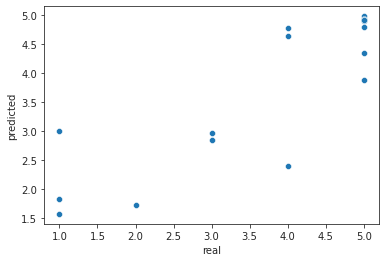

In [70]:
df_test = pd.DataFrame(np.asarray(list(zip(pred_test, y_test))), columns=["predicted", "real"])
sns.scatterplot(data=df_test, y="predicted", x="real")

<AxesSubplot:xlabel='predicted', ylabel='real'>

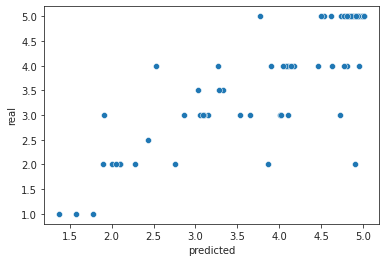

In [71]:

df_test = pd.DataFrame(np.asarray(list(zip(pred_train, y_train))), columns=["predicted", "real"])
sns.scatterplot(data=df_test, x="predicted", y="real")


In [72]:
dfst.columns[dfst.columns.str.contains("duration")]

Index(['Stitch duration [s]', 'Knot duration [s]', 'Piercing duration [s]'], dtype='object')

In [73]:
px.scatter(dfst, y="Needle holder stitch visibility [s]", x="Stitch duration [s]", hover_data=["filename", "stitch_id"], width=500)


In [80]:
px.scatter(dfst, y="Needle holder stitch visibility [%]", x="Stitch duration [s]", hover_data=["filename", "stitch_id"], width=500)
